In [1]:
import xml.etree.ElementTree as elemTree
import os
import sys
tree = elemTree.parse(r'../config/.config.xml')
root = tree.getroot()
xx = root.find('./PATHS')
work_path = xx.find('work').text
sys.path.append(work_path)

In [2]:
import numpy
import talib
from miscs.config_manager import ConfigManager
import pandas as pd
from sqlalchemy import create_engine
from tqdm.auto import tqdm
from realtime_kiwoom.data_provider import *
import re

In [3]:
cm = ConfigManager('../config/.config.xml')

In [4]:
history_provider = MinuteChartDataProvider.Factory(cm, tag='history')

In [56]:
history_minute_dic = history_provider.get_history_from_ndays_ago(n_days=7)

In [57]:
history_minute_dic

{'069500':                           st_code   open   high    low  close  volume
 dt                                                                   
 2022-09-21 09:00:00+09:00  069500  30535  30575  30510  30520   94882
 2022-09-21 09:01:00+09:00  069500  30525  30525  30510  30515   11742
 2022-09-21 09:02:00+09:00  069500  30515  30525  30505  30520   35715
 2022-09-21 09:03:00+09:00  069500  30515  30580  30515  30560   63126
 2022-09-21 09:04:00+09:00  069500  30565  30580  30560  30575   22733
 ...                           ...    ...    ...    ...    ...     ...
 2022-09-23 15:16:00+09:00  069500  29790  29795  29790  29790   80186
 2022-09-23 15:17:00+09:00  069500  29790  29800  29790  29795   67712
 2022-09-23 15:18:00+09:00  069500  29800  29810  29795  29810   62878
 2022-09-23 15:19:00+09:00  069500  29805  29810  29805  29810   75000
 2022-09-23 15:30:00+09:00  069500  29780  29780  29780  29780  104053
 
 [1145 rows x 6 columns],
 '114800':                           st

In [58]:
df = history_minute_dic['114800']

<AxesSubplot:>

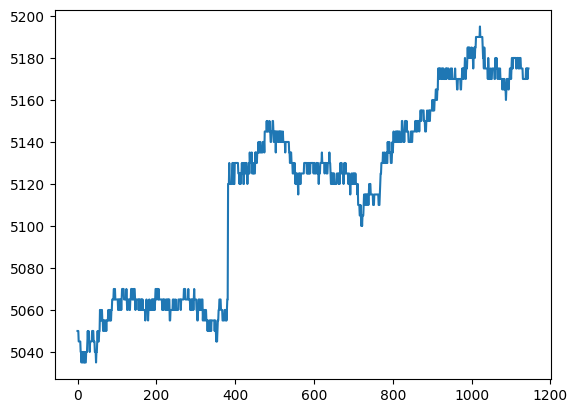

In [59]:
df['close'].plot(use_index=False)

<AxesSubplot:>

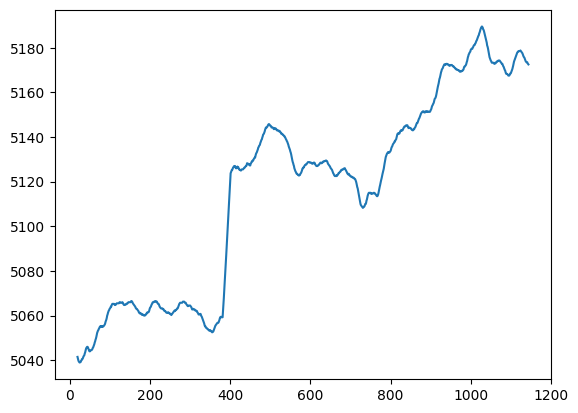

In [60]:
talib.MA(df['close'], timeperiod=20, matype=0).plot(use_index=False)

In [61]:
macd, macdsignal, macdhist = talib.MACD(df.close)

In [62]:
real = talib.ADX(df.high, df.low, df.close, timeperiod=14)

<AxesSubplot:>

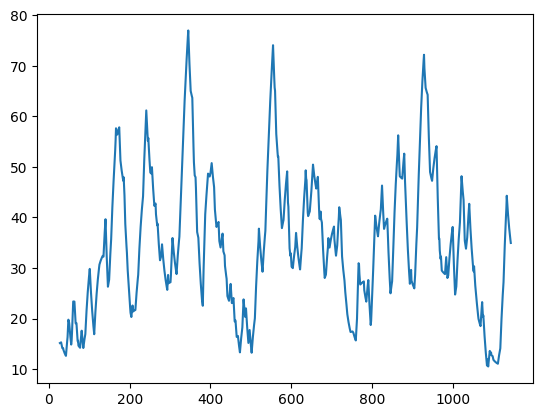

In [63]:
real.plot(use_index=False)

In [64]:
import plotly.graph_objects as go

In [65]:
def print_data_chart(data:pd.DataFrame):
    data['20EMA'] = talib.EMA(data['close'], 20)
    xindices = df.index.strftime('%m%d%H%M')
    chart_data = go.Candlestick(x=xindices, open=data['open'], high=data['high'], low=data['low'], close=data['close'])
    fig = go.Figure(data=[chart_data])
    ema_trace = go.Scatter(x=xindices, y=data['20EMA'], mode='lines', name='120EMA')
    fig.add_trace(ema_trace)
    fig.show()

In [66]:
df.index.strftime('%m%d%H%M')

Index(['09210900', '09210901', '09210902', '09210903', '09210904', '09210905',
       '09210906', '09210907', '09210908', '09210909',
       ...
       '09231511', '09231512', '09231513', '09231514', '09231515', '09231516',
       '09231517', '09231518', '09231519', '09231530'],
      dtype='object', name='dt', length=1145)

In [55]:
print_data_chart(df)